In [32]:
import os

path = os.chdir("C:\\Users\\ankush.agarwal\\OneDrive - Fractal Analytics Pvt. Ltd\\Documents\\PG - AI ML\\Statistic Essentials\\Lending Case Study")

print(path)
# /Users/mbp/Documents/my-project/python-snippets/notebook

print(type(path))
# <class 'str'>

None
<class 'NoneType'>


In [19]:
print(path)

None


In [33]:
print(os.getcwd())

C:\Users\ankush.agarwal\OneDrive - Fractal Analytics Pvt. Ltd\Documents\PG - AI ML\Statistic Essentials\Lending Case Study


In [76]:
import numpy as np, pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns 

In [34]:
pd.set_option('max_columns',None)

In [37]:
df = pd.read_csv("loan.csv",low_memory=False)

In [30]:
dic = pd.read_excel("Data_Dictionary.xlsx")

In [38]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [39]:
df.shape

(39717, 111)

## Data cleaning

Drop all coumns which have 100% NA vlaues



In [40]:
df = df.dropna(axis='columns',how='all')

In [41]:
len(df)

39717

In [42]:
df = df.dropna(thresh= len(df)*0.5,how='all',axis = 1)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Keep columns related to Applicant and Loan Characteristics only

In [293]:
df= df.iloc[:,0:30]

In [294]:
df.shape

(39717, 30)

Drop all row with loan_status as Current

In [46]:
df = df[df1.loan_status !='Current']

In [47]:
df.shape

(38577, 21)

In [297]:
# data cleaning for int_rate
df['int_rate']=df['int_rate'].apply(lambda x:x.replace('%','')).astype(float)


In [298]:
# dropping N/A value in employement length as there is no corelation with other attributes
df =df[~(df1['emp_length'].isna())]

In [300]:
def remove_year(x):
    value = re.sub("y.*", "", x).strip()
    if(value=="10+"):
        return 11
    elif (value=='< 1'):
        return 0
    else :
        return value

In [301]:
# replace year or years and convert column as int
df['emp_length']=df['emp_length'].apply(remove_year).astype(int)

TypeError: expected string or bytes-like object

**Create Some Buckets for certain columns**

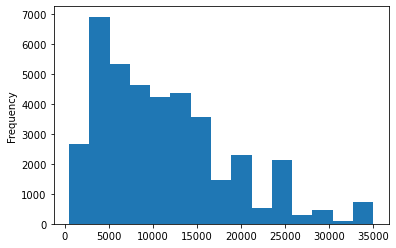

In [303]:
##Create histogram to see loan amount distribution
df1.loan_amnt.plot.hist(bins=15)

In [304]:
##Create Bucket based on the distribution
def f(row):
    if row['loan_amnt'] < 5000:
        val = "Less than 5000"
    elif row['loan_amnt'] >= 5000 and row['loan_amnt'] < 10000:
        val = "Between 5000 and 10000"
    elif row['loan_amnt'] >= 10000 and row['loan_amnt'] < 15000:
        val = "Between 10000 and 15000"
    else:
        val = "Greater than 15000"
    return val
df['loan_amnt_size'] = df.apply(f, axis=1)

<ipython-input-304-6b084f96dcd5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_amnt_size'] = df.apply(f, axis=1)


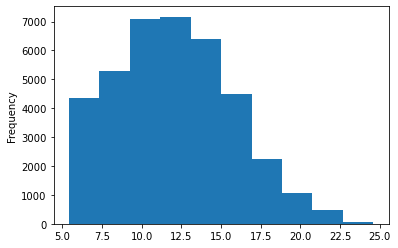

In [305]:
##Create histogram to see Int_rate distribution
df.int_rate.plot.hist()

In [307]:
##Create Bucket based on the distribution
def f1(row):
    if row['int_rate'] < 7.5:
        val = "Less than 7.5%"
    elif row['int_rate'] >= 7.5 and row['int_rate'] < 10:
        val = "Between 7.5% and 10%"
    elif row['int_rate'] >= 10 and row['int_rate'] < 12.5:
        val = "Between 10% and 12.5%"
    elif row['int_rate'] >= 12.5 and row['int_rate'] < 15:
        val = "Between 12.5% and 15%"
    else:
        val = "Greater than 15%"
    return val
df['int_rate_bucket'] = df.apply(f1, axis=1)

<ipython-input-307-0284b50d1b88>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int_rate_bucket'] = df.apply(f1, axis=1)


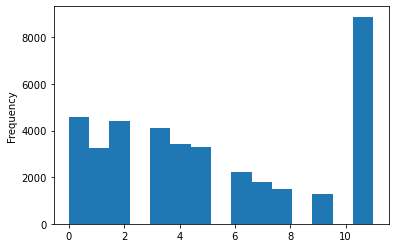

In [308]:
##Create histogram to see emp_length distribution
df.emp_length.plot.hist(bins=15)

In [309]:
##Create Bucket based on the distribution
def f2(row):
    if row['emp_length'] < 4:
        val = "0-3 years"
    elif row['emp_length'] >= 4 and row['emp_length'] < 7:
        val = "4-6 years"
    elif row['emp_length'] >= 7 and row['emp_length'] < 11:
        val = "7-10 years"
    else:
        val = "Greater than 10 years"
    return val
df['emp_length_Years'] = df.apply(f2, axis=1)

<ipython-input-309-a9085d238ba9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length_Years'] = df.apply(f2, axis=1)


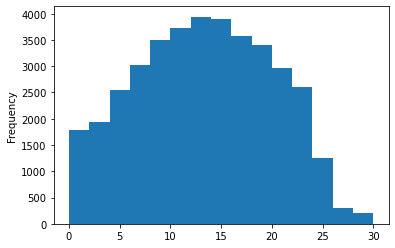

In [320]:
##Create histogram to see emp_length distribution
df.dti.plot.hist(bins=15)

In [321]:
def f2(row):
    if row['dti'] < 5:
        val = "0-5 "
    elif row['dti'] >= 5 and row['dti'] < 10:
        val = "5-10"
    elif row['dti'] >= 10 and row['emp_length'] < 15:
        val = "10-15"
    elif row['dti'] >= 15 and row['emp_length'] < 20:
        val = "15-20"
    else:
        val = "Greater than 20"
    return val
df['dti_size'] = df.apply(f2, axis=1)

<ipython-input-321-d9fbb026cb9b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dti_size'] = df.apply(f2, axis=1)


In [312]:
##Create Default column where 1 says 'Loan Defaulted' and 0 says 'Loan Paid'
df['Default'] = df.loan_status.apply(lambda x: 0 if x =='Fully Paid' else 1)

<ipython-input-312-699e0f45787a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Default'] = df.loan_status.apply(lambda x: 0 if x =='Fully Paid' else 1)


In [314]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amnt_size,int_rate_bucket,emp_length_Years,Default
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,11,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Between 5000 and 10000,Between 10% and 12.5%,Greater than 10 years,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Less than 5000,Greater than 15%,0-3 years,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,11,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Less than 5000,Greater than 15%,Greater than 10 years,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,11,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Between 10000 and 15000,Between 12.5% and 15%,Greater than 10 years,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Less than 5000,Between 12.5% and 15%,0-3 years,1


**Pivot Tables and Charts** 

Calculate default % for Term

In [315]:
A= pd.DataFrame(pd.pivot_table(df, values ='id', index =['home_ownership'], 
                         columns =['Default'], aggfunc='count') )

In [316]:
#Calculate Default % by each Variable
A['Default%'] = A[1]/(A[1]+A[0])*100
A['Paid%'] = A[0]/(A[1]+A[0])*100
A['Total Loans'] = A[1]+A[0]
A = A.reset_index()
A.sort_values('Default%',inplace=True)
A.head()

Default,home_ownership,0,1,Default%,Paid%,Total Loans
3,OWN,2370.0,471.0,16.578669,83.421331,2841.0
0,MORTGAGE,14350.0,2862.0,16.627934,83.372066,17212.0
4,RENT,15342.0,3146.0,17.016443,82.983557,18488.0
2,OTHER,80.0,18.0,18.367347,81.632653,98.0
1,NONE,3.0,NaN,NaN,NaN,NaN


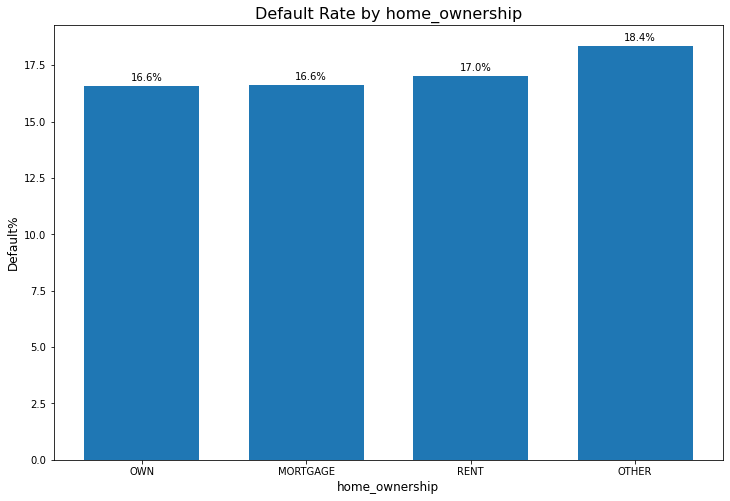

In [317]:
##Create Bar Chart for each Variable and show the Default%
xs = A['home_ownership']
ys = A['Default%']
plt.figure(figsize = (12, 8)) 
plt.bar(xs,ys,width =0.7)
for x,y in zip(xs,ys):

    label = "{:.1f}".format(y)+"%"

    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center') 
plt.xlabel("home_ownership",fontsize=12)
plt.ylabel("Default%",fontsize=12)
plt.title("Default Rate by home_ownership",fontsize=16)
plt.show()